## Defining the system parameters of problem~1

In [117]:
import numpy as np
from numpy import linalg as LA
import copy


n = 3
m = 4

A = np.array([
    [0.4,0,0],
    [0,0.6,0],
    [0.4,0.4,0.4]])

B = np.array([
    [-0.4, 0.3, 0, 0.2],
    [0.4, -0.6, -0.5, 0.2],
    [0, 0.3, 0, -0.4],
])

E = np.eye(n)
s = 1.5*np.array([1,1,1])
r = 0.5*np.array([1,1,1,1])



# Partitioning of columns & Actions
mi=[]
action=[]
for i in range(n):
    Ji = np.where(B[i, :] <0)[0]
    mi.append(len(Ji))
E_bar= E[0,:]
for i in range(1,n):
    for j in range(mi[i]):
        E_bar=np.vstack((E_bar,  E[i,:]))



# Value iteration to get the optimal cost parameter
p = np.zeros((n, 1))
pold = np.ones((n, 1))
its = 0
while np.linalg.norm(p - pold) > 1e-8:
    its += 1
    pold = p.copy()
    #-------------------------------
    n = len(p)
    BT=np.transpose(B)
    value1=BT.dot(p)
    value1=value1.reshape(-1)
    c = r + value1
    xi = np.zeros(n)  
    for i in range(n):
        Ji = B[i, :] < 0 
        CJi=c[Ji]
        CJi = np.append(CJi, np.array([0]))
        xi[i] = min(CJi)
    #------------------------------------
    AT=np.transpose(A)
    ET=np.transpose(E)
    value=AT.dot(p)
    value=value.reshape(-1)
    p = s +value + ET.dot(xi)
    print(p)
print(f"Number of iterations: {its}")
print(f"Final p: {p.flatten()}")
print("--------------------------------------------")
print("Eigenvalues of the dynamics matrix are:")
eigenvalues, eigenvectors = LA.eig(A)
print(eigenvalues)


[1.5 1.5 1.5]
[2.7  2.75 2.1 ]
[3.42  3.115 2.34 ]
[3.804  3.2475 2.436 ]
[3.996   3.29915 2.4744 ]
[4.08816  3.319675 2.48976 ]
[4.131168  3.3278715 2.495904 ]
[4.1508288  3.33114875 2.4983616 ]
[4.15967616 3.33245952 2.49934464]
[4.16360832 3.33298381 2.49973786]
[4.16533847 3.33319352 2.49989514]
[4.16609345 3.33327741 2.49995806]
[4.1664206  3.33331096 2.49998322]
[4.16656153 3.33332439 2.49999329]
[4.16662193 3.33332975 2.49999732]
[4.1666477  3.3333319  2.49999893]
[4.16665865 3.33333276 2.49999957]
[4.16666329 3.3333331  2.49999983]
[4.16666525 3.33333324 2.49999993]
[4.16666607 3.3333333  2.49999997]
[4.16666642 3.33333332 2.49999999]
[4.16666656 3.33333333 2.5       ]
[4.16666662 3.33333333 2.5       ]
[4.16666665 3.33333333 2.5       ]
[4.16666666 3.33333333 2.5       ]
[4.16666666 3.33333333 2.5       ]
Number of iterations: 26
Final p: [4.16666666 3.33333333 2.5       ]
--------------------------------------------
Eigenvalues of the dynamics matrix are:
[0.4 0.4 0.6]


## Defining the set of feasible policies, $\mathcal K(E)$

In [118]:
Ki=[]
Ki_feasible=[]
mi=[]
action=[]
l=0

for i in range(n):
    Ji = np.where(B[i, :] <0)[0]
    mi.append(len(Ji))
    Ki=[np.zeros((mi[i], n))]
    for j in range(mi[i]):
        Kii=np.zeros((mi[i], n))
        Kii[j][i]=1
        Ki.append(Kii)
    Ki_feasible.append(copy.deepcopy(Ki)) 

K_feasible=[]
for i in range(mi[0]+1):
    for j in range(mi[1]+1):
        SS1=np.concatenate((Ki_feasible[0][i], Ki_feasible[1][j]), axis=0)
        for k in range(mi[2]+1):
            SS=np.concatenate((SS1, Ki_feasible[2][k]), axis=0)
            K_feasible.append(SS)
    

#print("--------------------------")
print("All feasible policies")
K_feasible

All feasible policies


[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 array([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 array([[1., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]]),
 array([[1

### 

## The optimal $q$-parameter and the optimal gain $K$

### The optimal $q$-parameter 

In [119]:
q_star_pb1=np.concatenate((s+AT.dot(p),r+BT.dot(p)), axis=0)
np.set_printoptions(linewidth=1000, threshold=np.inf)
q_star_pb1 = q_star_pb1.reshape(-1, 1)
#print("--------------------------")
print("The optimal q-parameter:")
print(q_star_pb1)

The optimal q-parameter:
[[ 4.16666667]
 [ 4.5       ]
 [ 2.5       ]
 [ 0.16666667]
 [ 0.5       ]
 [-1.16666667]
 [ 1.        ]]


### The optimal gain $K$

In [120]:
#The optimal gain
BT=np.transpose(B)
value1=BT.dot(p)
value1=value1.reshape(-1)
c = r + value1
Kopt = np.zeros((m, n))
for j in range(m):
    i = np.where(B[:, j] < 0)[0]  # Find indices where column j has -1
    if len(i) > 0:
        i = i[0]  # Take the first index if there are multiple -1s
        Ji = np.where(B[i, :] <0)[0]  # Find indices where row i has -1
        if c[j] == min(np.min(c[Ji]), 0):
            Kopt[j, :] = E[i, :]

# The optimal one step policy          
x0=np.ones(n)
u = Kopt.dot(x0)
#print("--------------------------")
print("The optimal policy:")
Kopt

The optimal policy:


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

## Defining the parameters in SSP setup

In [121]:
# initial state
x0=np.array([1,0,0])



# number of states in SSP
nn=m


# Partitioning of columns & Actions
mi=[]
action=[]
for i in range(n):
    Ji = np.where(B[i, :] <0)[0]
    mi.append(len(Ji))
    action.append(range(0,len(Ji)+1))
mi.append(0)    
action.append(0)


# Constructing the transition probabilities - n transition vectors - Each of length mi+1 - call the
mm=0

T=[]
T1=[]
for i in range(n):
    Ka = np.zeros((m, n))
    TT=[]
    TT1=[]
    Acl=A+B.dot(Ka)
    Col=Acl[:,i]
    Col1=Col
    Col=np.append(Col, [1-sum(Col)], axis=0)
    TT1.append(Col1)
    TT.append(Col)
    for j in range(mi[i]):
        Ka[j+mm][i]=1
        Acl=A+B.dot(Ka)
        Col=Acl[:,i]
        Col1=Col
        Col=np.append(Col, [1-sum(Col)], axis=0)
        TT.append(Col)  
        TT1.append(Col1)
        Ka = np.zeros((m, n))
    # No action case
    mm=mm+mi[i]
    T.append(TT)
    T1.append(TT1)

Col=np.zeros(n+1)
Col[-1]=1
T.append([Col])     
    
    
# Constructing costs
Cost=[]
for i in range(n):
    cost=[]
    cost.append(s[i])
    for j in range(mi[i]):
        cost.append(s[i]+r[i+j])
    Cost.append(cost)
    
    
    
# Need to solve SSP problem now -- Solution via value iteration
# Initial value
J=[]
Polic=[]
J.append(np.zeros(n))
# Nbr of iterations
itr=100
for k in range(itr):
    JJ=np.zeros(n)
    Policy=np.zeros(n)
    for i in range(n):
        JJJ=[]
        Poll=[]
        for j in range(len(Cost[i])): ## number of actions 
            JJJ.append(Cost[i][j]+np.dot(J[-1],T[i][j][0:n]))
        JJ[i]=np.min(JJJ)
        minpos=JJJ.index(min(JJJ))
        Policy[i]=minpos      
    J.append(JJ)
    #print(J[-1])
    Polic.append(Policy)


## Comparing SSP optimal cost and our optimal control problem
print("-----------------------------------------------")
## Our problem 
print("Our problem cost:")
print(np.dot(x0,p))
print("SSP cost:")
print(np.dot(J[-1],x0))
print("Optimal policy in SSP")
print(Polic[-1])

#### from SSP policy to state space policy
Kopt_SSP = np.zeros((m, n))
E = np.eye(n)
mm=0
for i in range(n):
    if Polic[-1][i]!=0:
        Kopt_SSP[mm+mi[i]-1, :] = E[i, :]
    mm=mm+mi[i]
    
    
print("Optimal policy -- SSP --> state-space")
print(Kopt_SSP)
print("Optimal policy in original state-space")
print(Kopt)

-----------------------------------------------
Our problem cost:
4.166666663551677
SSP cost:
4.166666666666666
Optimal policy in SSP
[0. 2. 0.]
Optimal policy -- SSP --> state-space
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
Optimal policy in original state-space
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


## Model-based Q-learning algorithm -- This yields the optimal Q-function

In [122]:

import copy
states=range(n+1)
# Initialize q parameter 
q=[]
row1=[]
for i in range(n+1):
    row1.append(np.zeros(mi[i]+1))
q=[copy.deepcopy(row1)]
eps =0.00001
its = 1000
for l in range(its):
    for i in range(n):
        for j in range(mi[i]+1):
            MIN=[min(mini_list) for mini_list in q[-1][0:n]]
            row1[i][j]=Cost[i][j]+np.dot(T1[i][j],MIN ) 
    q.append(copy.deepcopy(row1))
q_star=q[-1]
J_star=np.array([min(mini_list) for mini_list in q_star]) ## Optimal cost from optimal Q-factor

#print("--------------------------")
print("The optimal Q-function:")
print(q_star)

The optimal Q-function:
[array([4.16666667, 4.33333333]), array([4.5       , 5.        , 3.33333333]), array([2.5, 3.5]), array([0.])]


## Model-free Q-learning algorithm

In [123]:

alpha=0.95 # rate of decrease of epsilon 
SEED = 6
np.random.seed(SEED)



nbr_runs=200
episodes=2001
gamma=[]
states=range(n+1)
epsilon =0.05

row1=[]
i_init=0
current_state=i_init
next_state=current_state
Saving_regrets=[]
k=0 # episode number 
for i in range(nbr_runs):
    k=0 # episode number 
    regrets=[]
    saving_regrets=[]
    row1=[]
    gamma=[]
    for i in range(n+1):
        row1.append(np.zeros(mi[i]+1))
        gamma.append(np.ones(mi[i]+1))
    q_modelfree=[copy.deepcopy(row1)]
    epsilon =0.05
    while True:
        costs = [0]
        current_state=i_init
        next_state=current_state
    
        while True:
            tmp = np.random.rand()
            if tmp < epsilon: # explore - random action
                    action_inst = np.random.choice(action[current_state])
            else: # exploit - use best action now according to the Q-factor
                    action_inst = np.argmin(q_modelfree[-1][current_state])
            next_state=np.random.choice(states,p=np.array(T[current_state][action_inst]))
            costs.append(costs[-1]+Cost[current_state][action_inst])
            gamma1=1/gamma[current_state][action_inst]
            row1[current_state][action_inst]=(1-gamma1)*q_modelfree[-1][current_state][action_inst]+\
             gamma1*(Cost[current_state][action_inst]+np.min(q_modelfree[-1][next_state][:]))
            q_modelfree.append(copy.deepcopy(row1)) 
            gamma[current_state][action_inst]=gamma[current_state][action_inst]+1
            current_state=next_state
            #n1=n1+1
            # updating the Q-factor
            if next_state==n:
                regrets.append(costs[-1] - J_star[i_init])
                #print(regrets[-1])
                if k % 10 == 0:  # samples the data at this episode
                    saving_regrets.append(np.sum(regrets))
                    #regrets = []
                k=k+1
                costs = 0
                epsilon=epsilon*pow(alpha,k)
                break

        if k == episodes:
            break

    Saving_regrets.append(saving_regrets) 

## Adaptive control algorithm proposed in the paper 

In [172]:


nbr_runs=5
epsilon=0.05
lambd=1
itr=100
nbr_episodes=2000
alpha=0.9999

Regret_save=[]
for run in range(nbr_runs):


    # Initial policy
    K=np.zeros((m,n))
    x0=x0.reshape(-1)
    x=[x0]
    x_opt=[x0]
    Sigma=[np.random.uniform(0,0.00001)*np.identity(n+m)]
    Sigma_bar=[np.zeros((n,n+m))]
    qq=[np.zeros(n+m)]
    u=[]
    u_opt=[]
    cc=np.concatenate((s,r), axis=0)
    KK=[K]
    cost=[0]
    cost_opt=[0]
    q=[np.zeros(n+m)]
    episode=0
    regret_save=[0]
    counter=0
    epsilon=0.05

    
    while True:    
        tmp = np.random.rand()
        if tmp<epsilon:     # explore     
            ll=np.random.choice(len(K_feasible))
            u.append(K_feasible[ll].dot(x[-1]))
        else:     # exploit
            u.append(KK[-1].dot(x[-1]))

        # optimal control
        u_opt.append(Kopt.dot(x_opt[-1]))
        
            
        cost.append(cost[-1]+np.dot(x[-1],s)+np.dot(u[-1],r))
        cost_opt.append(cost_opt[-1]+np.dot(x_opt[-1],s)+np.dot(u_opt[-1],r))
        sigma1=x[-1]
        sigma1=np.append(sigma1,u[-1])
        Sigma.append(lambd*Sigma[-1]+np.outer(sigma1,sigma1))
    
        # additive disturbances
        w = np.random.uniform(0,0.01,n)
        w=w.reshape(-1)
        
        # state update
        x.append(A.dot(x[-1])+B.dot(u[-1])+w)
        x_opt.append(A.dot(x_opt[-1])+B.dot(u_opt[-1])+w)
    
        Sigma_bar.append(lambd*Sigma_bar[-1]+np.outer(x[-1],sigma1))


        # constructing the iteration matrix
        H=Sigma_bar[-1].dot(np.linalg.inv(Sigma[-1]))
        HT=np.transpose(H)
    
        
        # Value iteration algorithm for finding the q function 
        q=[qq[-1]]
        for ll in range(0,itr):
            c_data=q[-1][n:]
            K = np.zeros((m, n))
            for j in range(m):
                l = np.where(B[:, j] <0)[0]  # Find indices where column j has -1
                if len(l) > 0:
                    l = l[0]  # Take the first index if there are multiple -1s
                    Ji = np.where(B[l, :] <0)[0]  # Find indices where row i has -1
                    if c_data[j] == min(np.min(c_data[Ji]), 0):
                        K[j, :] = E[l, :]
    
            
            I=np.concatenate((np.identity(n),K), axis=0)
            IT=np.transpose(I)
            q_rhs=IT.dot(q[-1])  
            q.append(HT.dot(q_rhs)+cc)
            


        qq.append(q[-1])
        KK.append(K)
        counter=counter+1
        if (sum(abs(x[-1]))<4*pow(10,-2) or counter==100):
            x=[x0]
            x_opt=[x0]
            episode=episode+1
            regret=cost[-1]-cost_opt[-1]
            regret_save.append(regret_save[-1]+regret)

            
            cost=[0]
            cost_opt=[0]
            epsilon=epsilon*pow(alpha,episode)
            counter=0
            
    
        if episode==nbr_episodes:
            break
            
            
    
    
    regret_save=regret_save[1:]
    Regret_save.append(regret_save)

        



# ---------------------------------------------------------

# Displaying results
print("The estimated & the optimal q:-------")
q[-1] = q[-1].reshape(-1, 1)
print("The estimated:")
print(q[-1])
print("The optimal:")
print(q_star_pb1)

The estimated & the optimal q:-------
The estimated:
[[ 4.42312918]
 [ 8.02989379]
 [ 2.74485978]
 [ 0.87242918]
 [ 2.16837829]
 [-2.65784663]
 [ 1.35565996]]
The optimal:
[[ 4.16666667]
 [ 4.5       ]
 [ 2.5       ]
 [ 0.16666667]
 [ 0.5       ]
 [-1.16666667]
 [ 1.        ]]


## Plotting regret results comparing adaptive control and Q-learning 

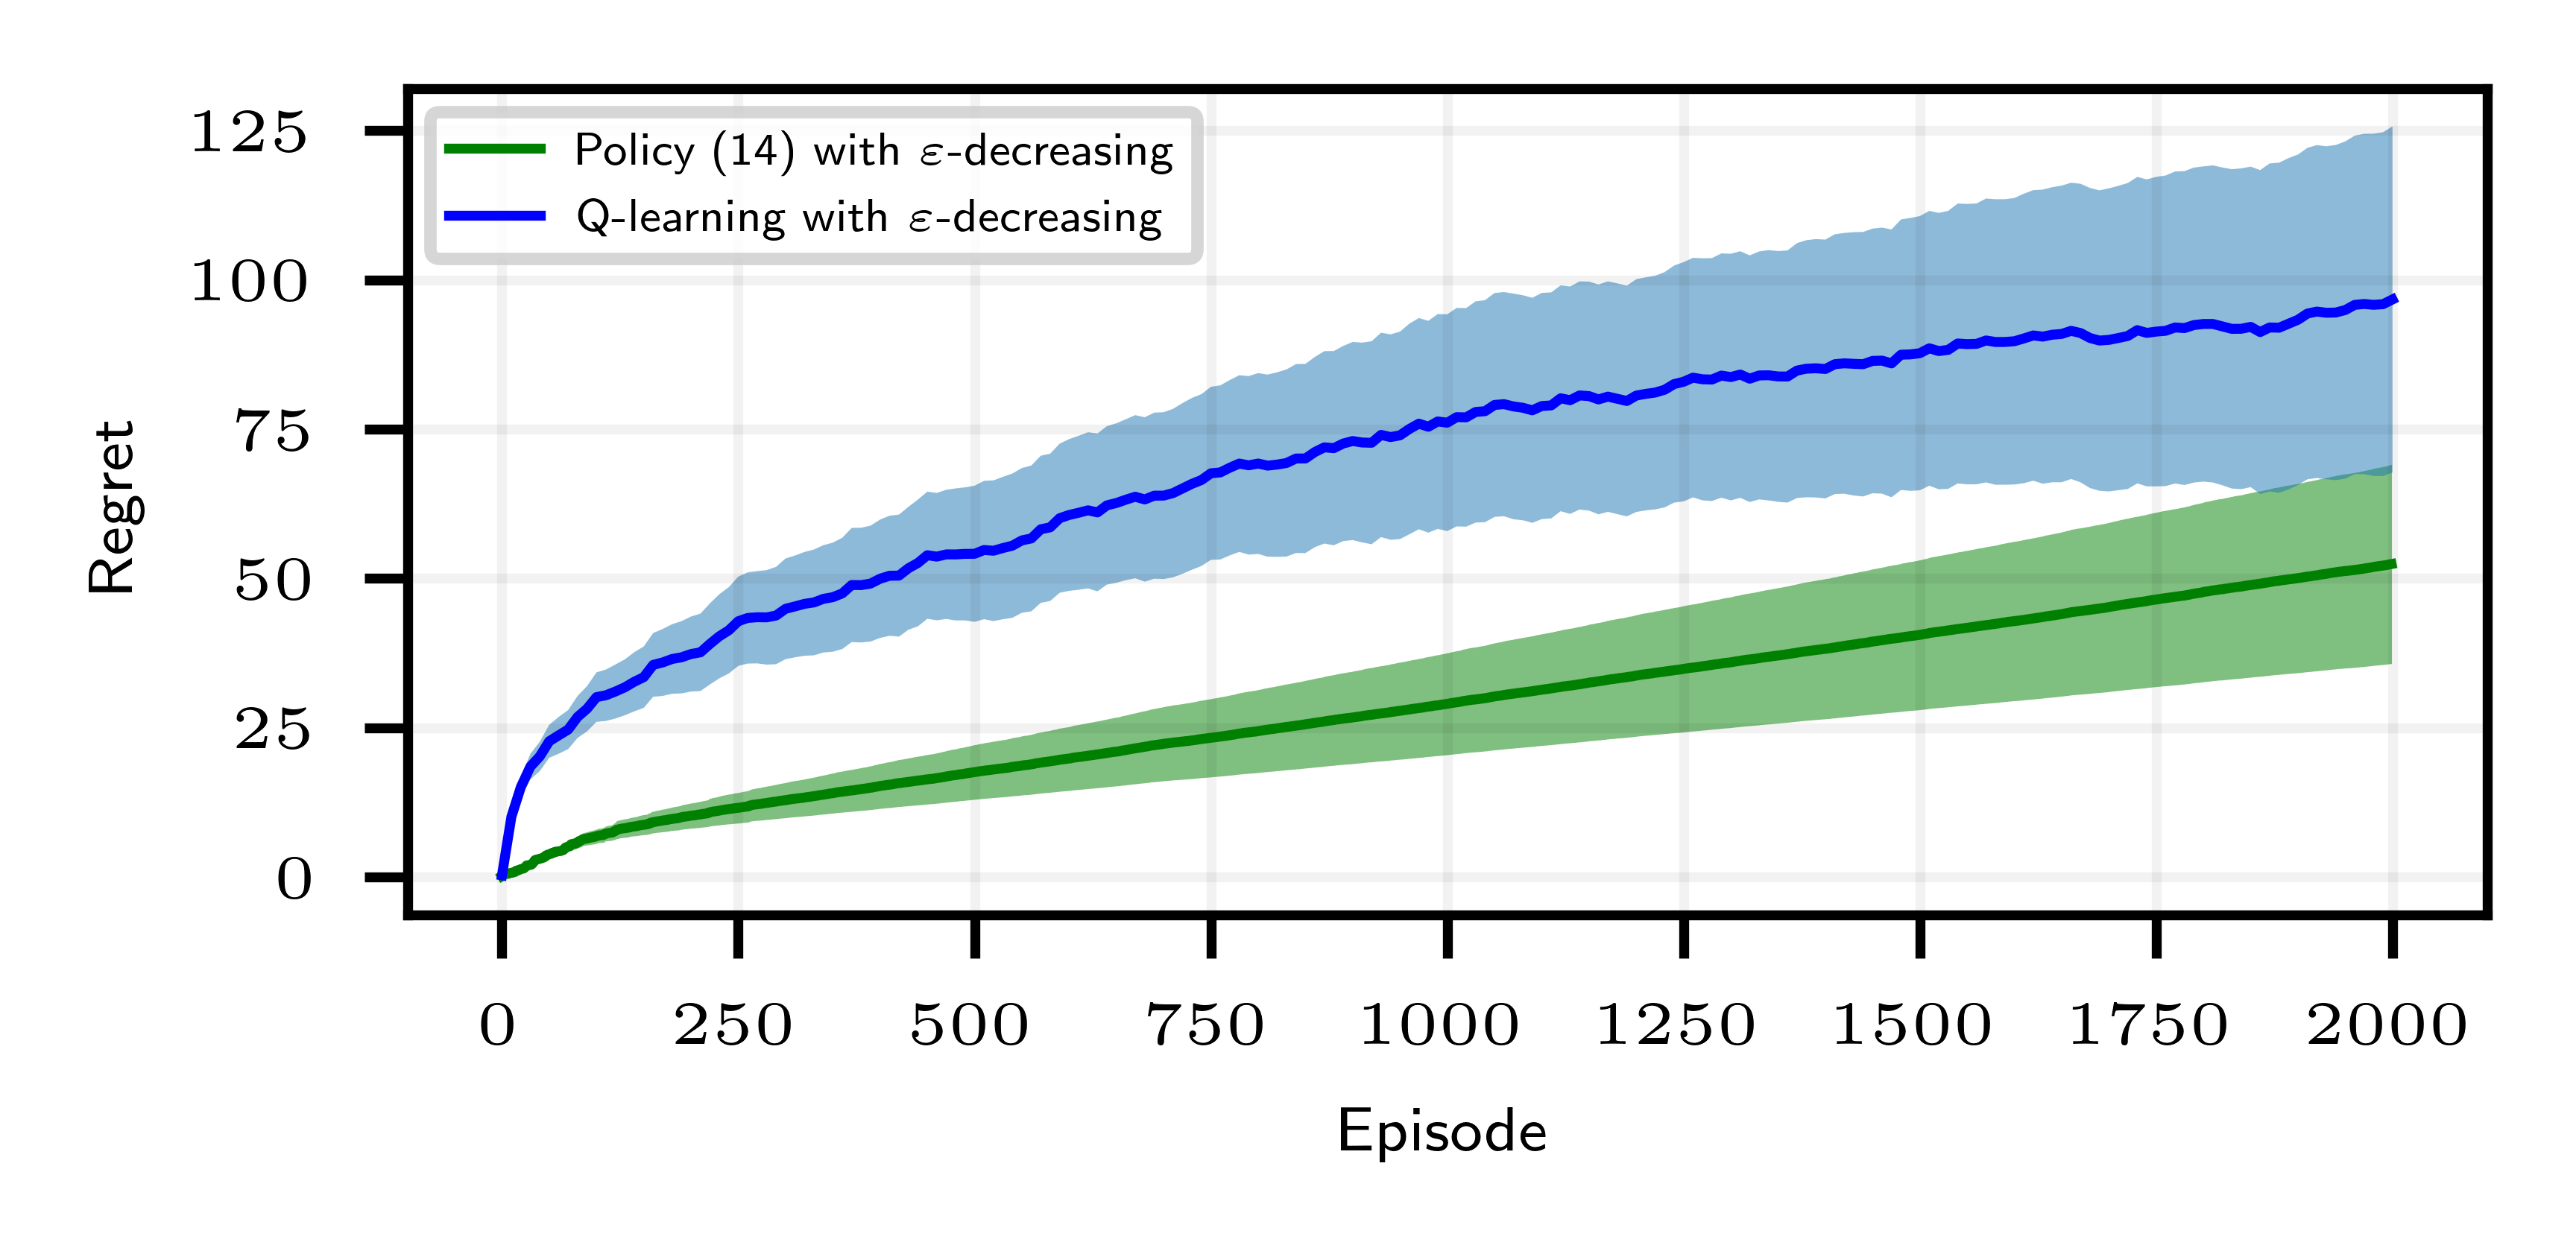

In [173]:
# Adaptive policy -------------------------------------------------
import scipy.stats
x = list(range(0, nbr_episodes))

confidence=0.4


nn = len(Regret_save)
avg_reg, se = np.mean(Regret_save, axis=0), scipy.stats.sem(Regret_save, axis=0)
conf = se * scipy.stats.t.ppf((1 + confidence) / 2., nn-1)

fig, axes = plt.subplots(figsize=(3, 1.2),dpi=1200)

axes.plot(x, avg_reg,color="green",linewidth=0.8,label=r'Policy (14) with $\varepsilon$-decreasing')
#axes.plot(x, regret_save,color="blue",linewidth=0.8,label=r'Adaptive controller with $\epsilon$-greedy')
axes.fill_between(x, avg_reg - conf, avg_reg+ conf,alpha=.5,color="green", linewidth=0)
plt.rcParams.update({'font.size': 5})

plt.rcParams['text.usetex'] = True



# Q-learning-------------------------------------------------------

x = list(range(0, episodes, 10))
axes.plot(x, avg_reg1,color="blue",linewidth=0.8,label=r'Q-learning with $\varepsilon$-decreasing')
#axes.plot(x, regret_save,color="blue",linewidth=0.8,label=r'Adaptive controller with $\epsilon$-greedy')
axes.fill_between(x, avg_reg1 - conf1, avg_reg1+ conf1,alpha=.5, linewidth=0)
plt.rcParams.update({'font.size': 5})




plt.legend(fontsize=3.7)
plt.grid(True, linestyle='-', color='black', alpha=0.05)
plt.xlabel('Episode')
plt.ylabel('Regret')
#axes.set_yscale('log')


plt.rcParams['text.usetex'] = True
fig.savefig('regret.pdf',bbox_inches='tight')



## Checking condition in (19)

In [179]:


nbr_runs=5
epsilon=0.05
lambd=1
itr=100
nbr_episodes=2000
alpha=0.9999999


Dyn=np.concatenate((A, B),axis=1)
Regret_save=[]
Test=[]
Test_test=[]
for run in range(nbr_runs):

    # Initial policy
    K=np.zeros((m,n))
    x0=x0.reshape(-1)
    x=[x0]
    Sigma=[np.random.uniform(0,0.000001)*np.identity(n+m)]
    Sigma_bar=[np.zeros((n,n+m))]
    qq=[np.zeros(n+m)]
    u=[]
    cc=np.concatenate((s,r), axis=0)
    KK=[K]
    cost=[0]
    q=[np.zeros(n+m)]
    episode=0
    Test=[]
    epsilon=0.05
    
    while True: 
        
        tmp = np.random.rand()
        if tmp<epsilon:     # explore     
            ll=np.random.choice(len(K_feasible))
            u.append(K_feasible[ll].dot(x[-1]))
        else:     # exploit
            u.append(KK[-1].dot(x[-1]))
            
        sigma1=x[-1]
        sigma1=np.append(sigma1,u[-1])
        Sigma.append(lambd*Sigma[-1]+np.outer(sigma1,sigma1))
    

        w = np.random.normal(0, 0.01, n)
        w=w.reshape(-1)
        # state update
        x.append(A.dot(x[-1])+B.dot(u[-1])+w)
    
        Sigma_bar.append(lambd*Sigma_bar[-1]+np.outer(x[-1],sigma1))


        # constructing the iteration matrix
        H=Sigma_bar[-1].dot(np.linalg.inv(Sigma[-1]))
        HT=np.transpose(H)







        
    
        
        # Value iteration algorithm for finding the q function 
        q=[qq[-1]]
        for ll in range(0,itr):
            c_data=q[-1][n:]
            K = np.zeros((m, n))
            for j in range(m):
                l = np.where(B[:, j] <0)[0]  # Find indices where column j has -1
                if len(l) > 0:
                    l = l[0]  # Take the first index if there are multiple -1s
                    Ji = np.where(B[l, :] <0)[0]  # Find indices where row i has -1
                    if c_data[j] == min(np.min(c_data[Ji]), 0):
                        K[j, :] = E[l, :]
    

            I=np.concatenate((np.identity(n),K), axis=0)
            IT=np.transpose(I)
            q_rhs=IT.dot(q[-1])  
            q.append(HT.dot(q_rhs)+cc)
            #print(q[-1])


        qq.append(q[-1])
        KK.append(K)

        if (sum(abs(x[-1]))<8*pow(10,-2) or counter==100):
            
            x=[x0]
            x_opt=[x0]
            episode=episode+1
            epsilon=epsilon*pow(alpha,episode)
            counter=0
            Sigma_inv=np.linalg.inv(Sigma[-1])
            Sigma_barT=Sigma_bar[-1]
            Mat=Sigma_barT.dot(Sigma_inv)-Dyn
            test=LA.norm(Mat, 1)
            Test.append(test)


            
        if episode==nbr_episodes:
            break
            
    

    Test_test.append(Test)
    

## Plotting the condition

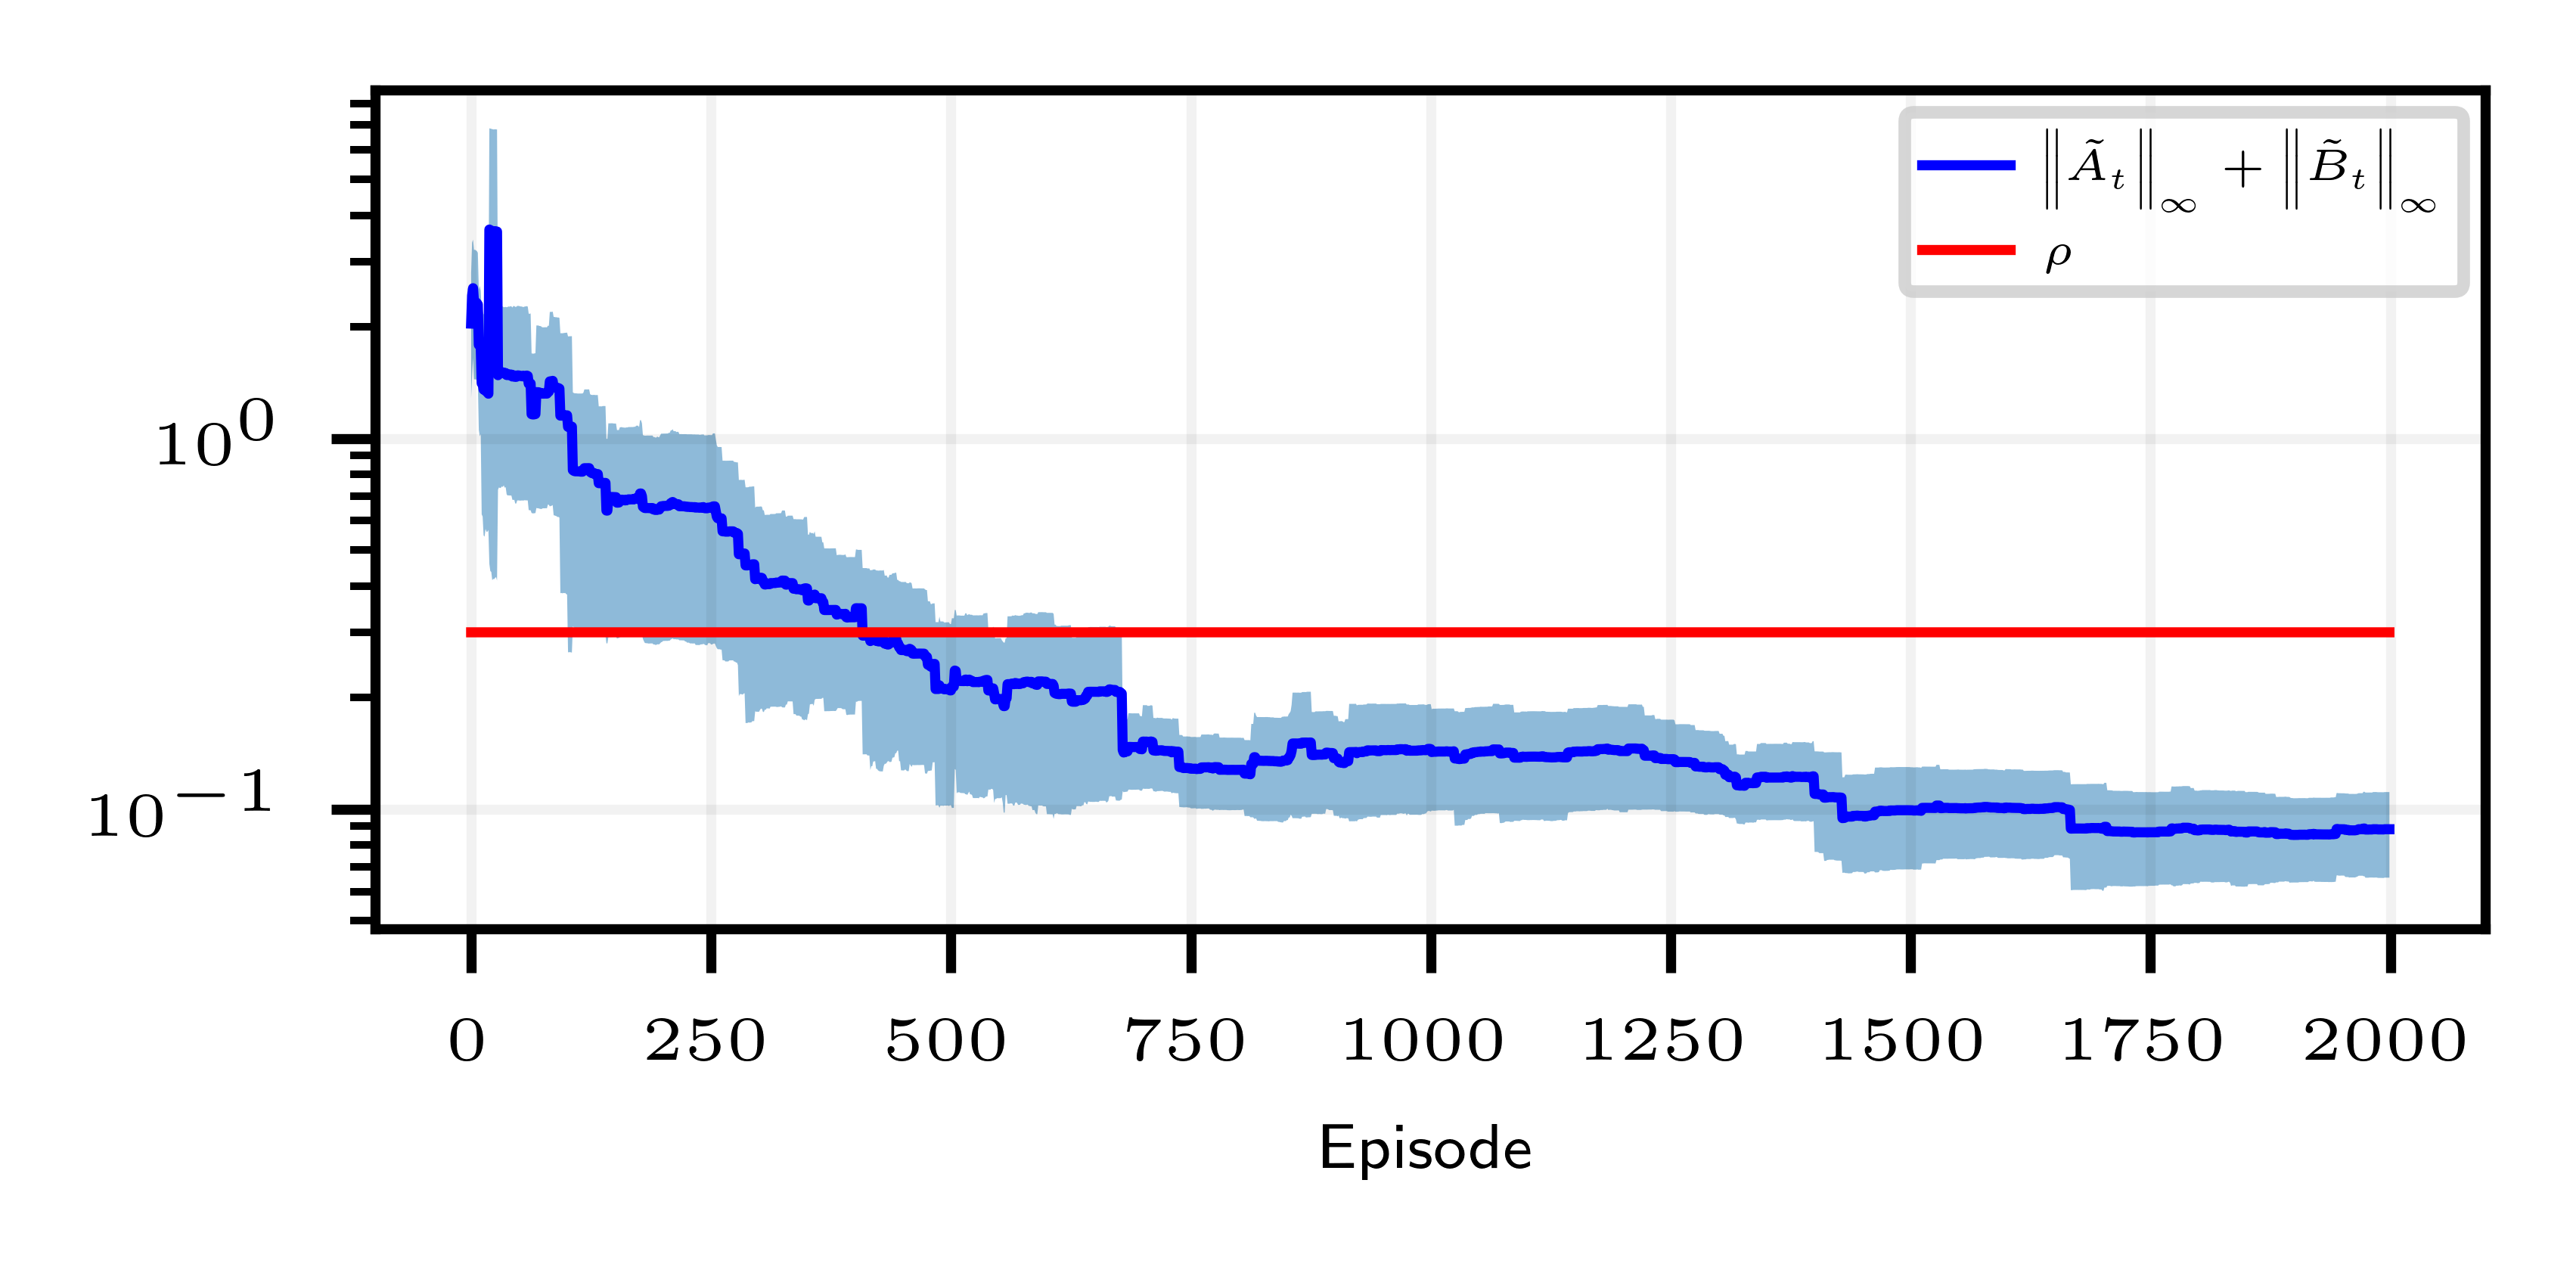

In [182]:
# constant 
const=0.3
cc=const*np.ones(nbr_episodes)



# Adaptive policy -------------------------------------------------
import scipy.stats
x = list(range(0, nbr_episodes))

confidence=0.75
nn = len(Test_test)
avg_reg, se = np.mean(Test_test, axis=0), scipy.stats.sem(Test_test, axis=0)
conf = se * scipy.stats.t.ppf((1 + confidence) / 2., nn-1)

fig, axes = plt.subplots(figsize=(3, 1.2),dpi=1200)

axes.plot(x, avg_reg,linewidth=0.8,color="blue",label=r' $\left\| \tilde A_t \right\|_\infty + \left\| \tilde B_t \right\|_\infty $')
axes.plot(x, cc,color="red",linewidth=0.8,label=r'$\rho$')
axes.fill_between(x, avg_reg - conf, avg_reg+ conf,alpha=.5, linewidth=0)


plt.rcParams.update({'font.size': 5})

plt.legend(fontsize=4)


plt.grid(True, linestyle='-', color='black', alpha=0.05)

plt.xlabel('Episode')
#plt.ylim([3*pow(10,-6), 2])
axes.set_yscale('log')
fig.savefig('condition-ep.pdf',bbox_inches='tight')
#plt.rcParams['text.usetex'] = True

plt.legend(fontsize=3.5)